In [1]:
!pip install google-play-scraper


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'app.bpjs.mobile',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi jkn yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=10000, # disini jumlah ulasan yang mau kita ambil ada sepuluh ribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,842b6232-6e66-43d3-9e11-8166a3339599,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,1229,4.12.0,2025-04-08 19:35:47,None,NaT,4.12.0
1,008e43b5-3325-4288-9ded-be4dfab88132,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,74,4.12.0,2025-04-23 18:50:28,Mohon maaf atas ketidaknyamanannya. Pastikan j...,2025-04-24 14:35:24,4.12.0
2,aa38f688-3bb3-49c4-b122-203930cc4d90,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,udah hampir sebulan yang lalu saya instal ini ...,1,237,4.12.0,2025-04-03 20:48:43,Mohon maaf atas ketidaknyamanannya. Terkait ke...,2025-04-23 11:03:54,4.12.0
3,ea8d9ad6-9ec4-43de-b6c2-c54b9f04a2e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,37,4.12.0,2025-04-21 07:27:15,None,NaT,4.12.0
4,ec952416-1229-433b-89fd-356124c91f32,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sekarang sering eror gabisa daftar online ke f...,1,44,4.12.0,2025-04-17 10:20:46,None,NaT,4.12.0


In [5]:
df_busu.to_csv("data/data_scraping2.csv", index = False)  #kemudian save menjadi file csv

In [6]:
my_df = pd.read_csv('data/data_scraping2.csv')


In [7]:
len(my_df.index) #kemudian hitung kembali berapa jumlah data yg didapatkan

10000

In [8]:
my_df[['userName', 'score','at', 'content']].head()  #dari scrapping tsb didapatkan banyak sekali kolom, kemudian kolom" tsb kita filter
                                                        #sehingga didapatkan kolom username, score, at dan content

,userName,score,at,content
0,Pengguna Google,1,2025-04-08 19:35:47,"APLIKASI SAMPAH, dana buat bikin aplikasi di K..."
1,Pengguna Google,1,2025-04-23 18:50:28,"Aplikasi jelek, sebenernya dibuat untuk memuda..."
2,Pengguna Google,1,2025-04-03 20:48:43,udah hampir sebulan yang lalu saya instal ini ...
3,Pengguna Google,1,2025-04-21 07:27:15,"aplikasi sangat tdk bersahabat, terutama bagi ..."
4,Pengguna Google,1,2025-04-17 10:20:46,Sekarang sering eror gabisa daftar online ke f...


In [9]:
my_df=my_df[['content', 'score']]#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.


In [10]:
my_df.head()

,content,score
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1
2,udah hampir sebulan yang lalu saya instal ini ...,1
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1
4,Sekarang sering eror gabisa daftar online ke f...,1


## **PELABELAN**

In [11]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

,content,score,Label
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif


In [12]:
my_df.to_csv("data/scrapped_data2.csv", index = False)  #kemudian save menjadi file csv

## **CLEANING DATA**

In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('data/scrapped_data2.csv')
my_df.head(50)

,content,score,Label
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif


In [14]:
# info() digunakan untuk menampilkan informasi detail tentang dataframe,
#seperti jumlah baris data, nama-nama kolom berserta jumlah data dan tipe datanya, dan sebagainya.
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   score    10000 non-null  int64 
 2   Label    9339 non-null   object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [15]:
#Tampilkan setiap baris yang memiliki nilai null (NaN) pada kolom apapun
#Gunakan fitur isna() yang disediakan library pandas
my_df.isna()

,content,score,Label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
9995,False,False,False
9996,False,False,False
9997,False,False,False
9998,False,False,False


In [16]:
my_df.isna().any()

content    False
score      False
Label       True
dtype: bool

In [17]:
my_df.describe()

,score
count,10000.00000
mean,1.83100
std,1.40728
min,1.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,5.00000


In [18]:
#mencari jumlah baris data yang bernilai null
#terdapat kolom label memiliki nilai kosong
my_df.isnull().sum()

content      0
score        0
Label      661
dtype: int64

## **Handling Missing value-Ignore tuple**

In [19]:
my_df.dropna(subset=['Label'],inplace = True)

In [20]:
my_df.isnull().sum()

content    0
score      0
Label      0
dtype: int64

In [21]:
my_df.head(50)

,content,score,Label
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif


In [22]:
import re
def clean_text(df, content_field_name, new_text_field_name):
    df[new_text_field_name] = df[content_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

In [23]:
my_df['text_clean'] = my_df['content']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)

,content,score,Label,text_clean
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,APLIKASI SAMPAH dana buat bikin aplikasi di KO...
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,Aplikasi jelek sebenernya dibuat untuk memudah...
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif,udah hampir sebulan yang lalu saya instal ini ...
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif,aplikasi sangat tdk bersahabat terutama bagi l...
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif,Sekarang sering eror gabisa daftar online ke f...
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif,Penambahan fitur dan menu didalam aplikasi ini...
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif,Aplikasi buruk tidak bisa verifikasi pesan not...
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif,Kok bisa sih udah banyak yang bintang tapi ra...
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,Aplikasi macam apa iniiiimau daftar aja susah ...
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,Aplikasi sampah proses pendaftaran dibuat ruwe...


In [24]:
my_df.to_csv("data/jknpreprocessing2.csv", index = False)  #simpan hasil file data cleaning dengan nama shopeepreprocessing.csv

## **Text PreProcessing**

In [25]:
import pandas as pd
df = pd.read_csv('data/jknpreprocessing2.csv')
df.head(50)

,content,score,Label,text_clean
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,APLIKASI SAMPAH dana buat bikin aplikasi di KO...
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,Aplikasi jelek sebenernya dibuat untuk memudah...
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif,udah hampir sebulan yang lalu saya instal ini ...
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif,aplikasi sangat tdk bersahabat terutama bagi l...
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif,Sekarang sering eror gabisa daftar online ke f...
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif,Penambahan fitur dan menu didalam aplikasi ini...
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif,Aplikasi buruk tidak bisa verifikasi pesan not...
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif,Kok bisa sih udah banyak yang bintang tapi ra...
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,Aplikasi macam apa iniiiimau daftar aja susah ...
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,Aplikasi sampah proses pendaftaran dibuat ruwe...


## **Case Folding**

In [26]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [27]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(10)


,content,score,Label,text_clean
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,aplikasi sampah dana buat bikin aplikasi di ko...
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,aplikasi jelek sebenernya dibuat untuk memudah...
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif,udah hampir sebulan yang lalu saya instal ini ...
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif,aplikasi sangat tdk bersahabat terutama bagi l...
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif,sekarang sering eror gabisa daftar online ke f...
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif,penambahan fitur dan menu didalam aplikasi ini...
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif,aplikasi buruk tidak bisa verifikasi pesan not...
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif,kok bisa sih udah banyak yang bintang tapi ra...
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,aplikasi macam apa iniiiimau daftar aja susah ...
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,aplikasi sampah proses pendaftaran dibuat ruwe...


## **Stopword Removal**

In [28]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
my_stopwords = (['yang', 'dan', 'di', 'dari', 'kalo', 'yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'ku',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg', 'gw','guys','gtu','fyi','epek',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't','nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru', 'ypadahal', 'cokk', 'utuk','untuk', 'kasih','sangatsangat','sanggat', 'the',
                       'mulu','jd','jdi','gk','oe'])
stop.extend(my_stopwords)
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62877/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,Label,text_clean,text_StopWord
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,aplikasi sampah dana buat bikin aplikasi di ko...,aplikasi sampah dana aplikasi korupsi sampe ap...
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,aplikasi jelek sebenernya dibuat untuk memudah...,aplikasi jelek sebenernya memudahkan menyulitk...
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif,udah hampir sebulan yang lalu saya instal ini ...,sebulan instal apk ko login ambil foto layanan...
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif,aplikasi sangat tdk bersahabat terutama bagi l...,aplikasi bersahabat lansia bolakbalikterlalu i...
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif,sekarang sering eror gabisa daftar online ke f...,eror gabisa daftar online faskes daftar online...
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif,penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur menu didalam aplikasi sederha...
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif,aplikasi buruk tidak bisa verifikasi pesan not...,aplikasi buruk verifikasi pesan notifikasi mas...
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif,kok bisa sih udah banyak yang bintang tapi ra...,bintang ratingnya tetep keluhannya verifikasi ...
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,aplikasi macam apa iniiiimau daftar aja susah ...,aplikasi iniiiimau daftar susah bangetkode otp...
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,aplikasi sampah proses pendaftaran dibuat ruwe...,aplikasi sampah proses pendaftaran ruwet verif...


## **Tokenizing**

In [29]:
import nltk
nltk.download('punkt')  # Ensure the main punkt package is downloaded
nltk.download('punkt_tab') # Download the missing punkt_tab resource
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head(50)

[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\62877/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,aplikasi sampah dana buat bikin aplikasi di ko...,aplikasi sampah dana aplikasi korupsi sampe ap...,"[aplikasi, sampah, dana, aplikasi, korupsi, sa..."
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,aplikasi jelek sebenernya dibuat untuk memudah...,aplikasi jelek sebenernya memudahkan menyulitk...,"[aplikasi, jelek, sebenernya, memudahkan, meny..."
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif,udah hampir sebulan yang lalu saya instal ini ...,sebulan instal apk ko login ambil foto layanan...,"[sebulan, instal, apk, ko, login, ambil, foto,..."
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif,aplikasi sangat tdk bersahabat terutama bagi l...,aplikasi bersahabat lansia bolakbalikterlalu i...,"[aplikasi, bersahabat, lansia, bolakbalikterla..."
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif,sekarang sering eror gabisa daftar online ke f...,eror gabisa daftar online faskes daftar online...,"[eror, gabisa, daftar, online, faskes, daftar,..."
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif,penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur menu didalam aplikasi sederha...,"[penambahan, fitur, menu, didalam, aplikasi, s..."
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif,aplikasi buruk tidak bisa verifikasi pesan not...,aplikasi buruk verifikasi pesan notifikasi mas...,"[aplikasi, buruk, verifikasi, pesan, notifikas..."
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif,kok bisa sih udah banyak yang bintang tapi ra...,bintang ratingnya tetep keluhannya verifikasi ...,"[bintang, ratingnya, tetep, keluhannya, verifi..."
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,aplikasi macam apa iniiiimau daftar aja susah ...,aplikasi iniiiimau daftar susah bangetkode otp...,"[aplikasi, iniiiimau, daftar, susah, bangetkod..."
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,aplikasi sampah proses pendaftaran dibuat ruwe...,aplikasi sampah proses pendaftaran ruwet verif...,"[aplikasi, sampah, proses, pendaftaran, ruwet,..."


In [30]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head(50)


[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,Label,text_clean,text_StopWord,text_tokens
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,aplikasi sampah dana buat bikin aplikasi di ko...,aplikasi sampah dana aplikasi korupsi sampe ap...,"[aplikasi, sampah, dana, aplikasi, korupsi, sa..."
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,aplikasi jelek sebenernya dibuat untuk memudah...,aplikasi jelek sebenernya memudahkan menyulitk...,"[aplikasi, jelek, sebenernya, memudahkan, meny..."
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif,udah hampir sebulan yang lalu saya instal ini ...,sebulan instal apk ko login ambil foto layanan...,"[sebulan, instal, apk, ko, login, ambil, foto,..."
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif,aplikasi sangat tdk bersahabat terutama bagi l...,aplikasi bersahabat lansia bolakbalikterlalu i...,"[aplikasi, bersahabat, lansia, bolakbalikterla..."
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif,sekarang sering eror gabisa daftar online ke f...,eror gabisa daftar online faskes daftar online...,"[eror, gabisa, daftar, online, faskes, daftar,..."
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif,penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur menu didalam aplikasi sederha...,"[penambahan, fitur, menu, didalam, aplikasi, s..."
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif,aplikasi buruk tidak bisa verifikasi pesan not...,aplikasi buruk verifikasi pesan notifikasi mas...,"[aplikasi, buruk, verifikasi, pesan, notifikas..."
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif,kok bisa sih udah banyak yang bintang tapi ra...,bintang ratingnya tetep keluhannya verifikasi ...,"[bintang, ratingnya, tetep, keluhannya, verifi..."
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,aplikasi macam apa iniiiimau daftar aja susah ...,aplikasi iniiiimau daftar susah bangetkode otp...,"[aplikasi, iniiiimau, daftar, susah, bangetkod..."
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,aplikasi sampah proses pendaftaran dibuat ruwe...,aplikasi sampah proses pendaftaran ruwet verif...,"[aplikasi, sampah, proses, pendaftaran, ruwet,..."


In [31]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
import nltk
print(nltk.data.find('tokenizers/punkt'))


C:\Users\62877\nltk_data\tokenizers\punkt


In [33]:
import os
import nltk
nltk.data.path.append(os.path.expanduser('~/nltk_data'))
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to C:\Users\62877/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## **Stemming**

In [34]:
!pip install Sastrawi


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [36]:
#-----------------STEMMING -----------------
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script ini bisa dipisah dari eksekusinya setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

14315
------------------------
1 : aplikasi : aplikasi
2 : sampah : sampah
3 : dana : dana
4 : korupsi : korupsi
5 : sampe : sampe
6 : memudahkan : mudah
7 : masyarakat : masyarakat
8 : mempersulit : sulit
9 : daftar : daftar
10 : susah : susah
11 : otp : otp
12 : kirim : kirim
13 : verifikasi : verifikasi
14 : wajah : wajah
15 : nomor : nomor
16 : telepon : telepon
17 : berubah : ubah
18 : berakhiran : akhir
19 : gini : gin
20 : login : login
21 : gimana : gimana
22 : lupa : lupa
23 : password : password
24 : reset : reset
25 : keganti : ganti
26 : jelek : jelek
27 : sebenernya : sebenernya
28 : menyulitkan : sulit
29 : pengguna : guna
30 : kode : kode
31 : masuk : masuk
32 : coba : coba
33 : hp : hp
34 : tolong : tolong
35 : diperbaikin : diperbaikin
36 : sebulan : bulan
37 : instal : instal
38 : apk : apk
39 : ko : ko
40 : ambil : ambil
41 : foto : foto
42 : layanan : layan
43 : bermasalah : masalah
44 : respon : respon
45 : maksudnya : maksud
46 : gmna : gmna
47 : serumit : rumit
4

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
0,"APLIKASI SAMPAH, dana buat bikin aplikasi di K...",1,Negatif,aplikasi sampah dana buat bikin aplikasi di ko...,aplikasi sampah dana aplikasi korupsi sampe ap...,"[aplikasi, sampah, dana, aplikasi, korupsi, sa...",aplikasi sampah dana aplikasi korupsi sampe ap...
1,"Aplikasi jelek, sebenernya dibuat untuk memuda...",1,Negatif,aplikasi jelek sebenernya dibuat untuk memudah...,aplikasi jelek sebenernya memudahkan menyulitk...,"[aplikasi, jelek, sebenernya, memudahkan, meny...",aplikasi jelek sebenernya mudah sulit masyarak...
2,udah hampir sebulan yang lalu saya instal ini ...,1,Negatif,udah hampir sebulan yang lalu saya instal ini ...,sebulan instal apk ko login ambil foto layanan...,"[sebulan, instal, apk, ko, login, ambil, foto,...",bulan instal apk ko login ambil foto layan mas...
3,"aplikasi sangat tdk bersahabat, terutama bagi ...",1,Negatif,aplikasi sangat tdk bersahabat terutama bagi l...,aplikasi bersahabat lansia bolakbalikterlalu i...,"[aplikasi, bersahabat, lansia, bolakbalikterla...",aplikasi sahabat lansia bolakbalikterlalu inte...
4,Sekarang sering eror gabisa daftar online ke f...,1,Negatif,sekarang sering eror gabisa daftar online ke f...,eror gabisa daftar online faskes daftar online...,"[eror, gabisa, daftar, online, faskes, daftar,...",eror gabisa daftar online faskes daftar online...
5,Penambahan fitur dan menu didalam aplikasi ini...,1,Negatif,penambahan fitur dan menu didalam aplikasi ini...,penambahan fitur menu didalam aplikasi sederha...,"[penambahan, fitur, menu, didalam, aplikasi, s...",tambah fitur menu dalam aplikasi sederhana apl...
6,"Aplikasi buruk, tidak bisa verifikasi, pesan n...",1,Negatif,aplikasi buruk tidak bisa verifikasi pesan not...,aplikasi buruk verifikasi pesan notifikasi mas...,"[aplikasi, buruk, verifikasi, pesan, notifikas...",aplikasi buruk verifikasi pesan notifikasi mas...
7,Kok bisa sih udah banyak yang bintang 1 tapi r...,1,Negatif,kok bisa sih udah banyak yang bintang tapi ra...,bintang ratingnya tetep keluhannya verifikasi ...,"[bintang, ratingnya, tetep, keluhannya, verifi...",bintang ratingnya tetep keluh verifikasi wajah...
8,"Aplikasi macam apa iniiii,mau daftar aja susah...",1,Negatif,aplikasi macam apa iniiiimau daftar aja susah ...,aplikasi iniiiimau daftar susah bangetkode otp...,"[aplikasi, iniiiimau, daftar, susah, bangetkod...",aplikasi iniiiimau daftar susah bangetkode otp...
9,"Aplikasi sampah, proses pendaftaran dibuat ruw...",1,Negatif,aplikasi sampah proses pendaftaran dibuat ruwe...,aplikasi sampah proses pendaftaran ruwet verif...,"[aplikasi, sampah, proses, pendaftaran, ruwet,...",aplikasi sampah proses daftar ruwet verifikasi...


In [37]:
data_clean.to_csv('data/hasil_TextPreProcessing_jkn.csv', index= False) #kemudian simpan hasil text preprocessing ke file csv

In [38]:
#disini kita importkan library re, kemudian kita lakukan praproses
import re
def praproses(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)()(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

spliting data

memecah data test 20% dari keseluruhan data

In [39]:
from sklearn.utils import resample

#memisahkan data per label
positif = data_clean[data_clean['Label'] == 'Positif']
negatif = data_clean[data_clean['Label'] == 'Negatif']

#oversampling label positif
positif_oversampled = resample(positif,
                               replace=True,
                               n_samples=7000,   #jumlah oversampling
                               random_state=42)

#gabungkan kembali
df_oversampled = pd.concat([negatif, positif_oversampled])

print(df_oversampled['Label'].value_counts())

Label
Negatif    7734
Positif    7000
Name: count, dtype: int64


In [40]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_oversampled['content'], df_oversampled['Label'], test_size = 0.20, random_state = 42)

pembobotan tf-idf

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11787,)
(11787,)
(2947,)
(2947,)


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [44]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [45]:
from sklearn.svm import SVC

nb = SVC()
nb.fit(tfidf_train, y_train)

SVC()

In [46]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
y_pred = nb.predict(tfidf_test)

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = SVC()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test,predicted))


print(f'\nconfusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('\n====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Load dataset
data_clean = pd.read_csv('data/hasil_TextPreProcessing_jkn.csv')

SVM Accuracy: 0.9636918900576857

confusion_matrix:
 [[1523   47]
 [  60 1317]]


              precision    recall  f1-score   support

     Negatif       0.96      0.97      0.97      1570
     Positif       0.97      0.96      0.96      1377

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



Visualisasi data

C:\Users\62877\AppData\Local\Temp\ipykernel_27464\2406865919.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')


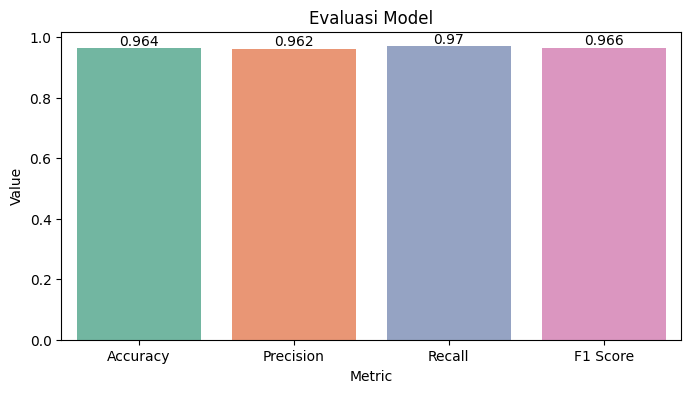

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrik evaluasi
accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average="binary", pos_label="Negatif")
recall = recall_score(y_test, predicted, average="binary", pos_label="Negatif")
f1 = f1_score(y_test, predicted, average="binary", pos_label="Negatif")

# Menyimpan metrik evaluasi dalam sebuah DataFrame
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                           'Value': [accuracy, precision, recall, f1]})

# Membuat grafik batang
plt.figure(figsize=(8, 4))
sns.barplot(x='Metric', y='Value', data=metrics_df, palette='Set2')
plt.title('Evaluasi Model')
plt.xlabel('Metric')
plt.ylabel('Value')

# Menampilkan nilai di atas setiap batang
for i, value in enumerate(metrics_df['Value']):
    plt.text(i, value, round(value, 3), ha='center', va='bottom')

# Tampilkan grafik
plt.show()

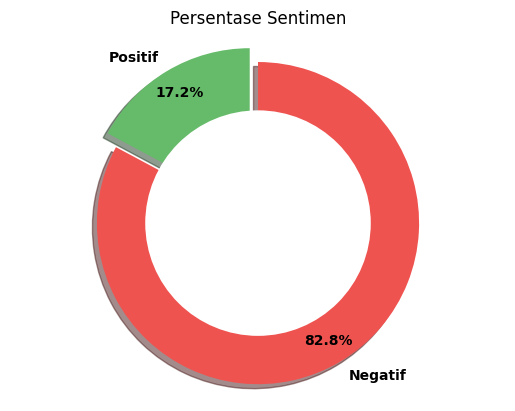

In [52]:
import matplotlib.pyplot as plt
import numpy as np

positif_count = my_df[my_df['Label'] == 'Positif'].shape[0]
negatif_count = my_df[my_df['Label'] == 'Negatif'].shape[0]

labels = ['Positif', 'Negatif']
sizes = [positif_count, negatif_count]

colors = ['#66bb6a', '#ef5350']

explode = (0.1, 0)

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_weight('bold')

for text in texts:
    text.set_color('black')
    text.set_weight('bold')

ax.axis('equal')

plt.title('Persentase Sentimen')

plt.show()


In [53]:
!pip install seaborn
df = pd.read_csv('data/data_scraping2.csv')

print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0= {len(df [df['score'] ==1.0])} rows")
print(f"rating 2.0 = {len (df[df['score']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['score']==3.0])} rows")
print(f"rating 4.0 = {len(df [df['score']== 4.0])} rows")
print(f"rating 5.0= {len(df[df['score']==5.0])} rows")
unique_scores = df['score'].unique()

# Buat palet warna kustom dengan rating 1 berwarna merah
custom_palette = {str(score): 'red' if score == 1.0
                  else 'orange' if score == 2.0
                  else 'yellow' if score == 3.0
                  else 'blue' if score == 4.0
                  else 'green' for score in unique_scores}

Input data has 10000 rows and 11 columns
rating 1.0= 6802 rows
rating 2.0 = 932 rows
rating 3.0 = 661 rows
rating 4.0 = 364 rows
rating 5.0= 1241 rows



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\62877\AppData\Local\Temp\ipykernel_27464\3327830504.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette=custom_palette);


Number of null in label: 0
Number of null in text: 0


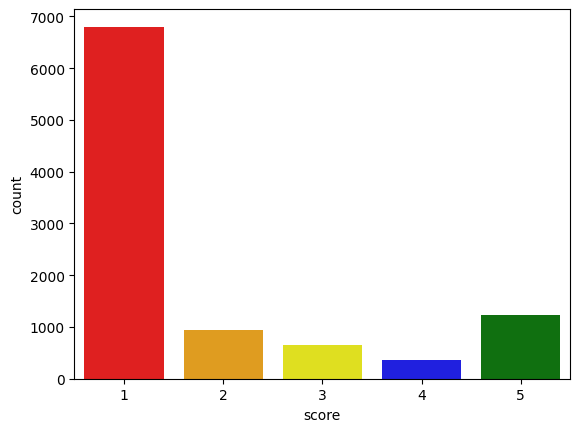

In [54]:
import seaborn as sns

# Hitung jumlah nilai null di kolom 'score' dan 'text'
print(f"Number of null in label: {df['score'].isnull().sum()}")
print(f"Number of null in text: {df['score'].isnull().sum()}")

sns.countplot(x='score', data=df, palette=custom_palette);

In [55]:
from wordcloud import WordCloud
df = pd.read_csv('data/hasil_TextPreProcessing_jkn.csv')

df_negative = df[ (df['score']==1.0) | (df['score'] ==2.0)]
df_positive = df[ (df['score']==4.0) | (df['score']==5.0)]


negative_list = df_negative['text_steamindo'].tolist()
positive_list = df_positive['text_steamindo'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()


filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()


Positif

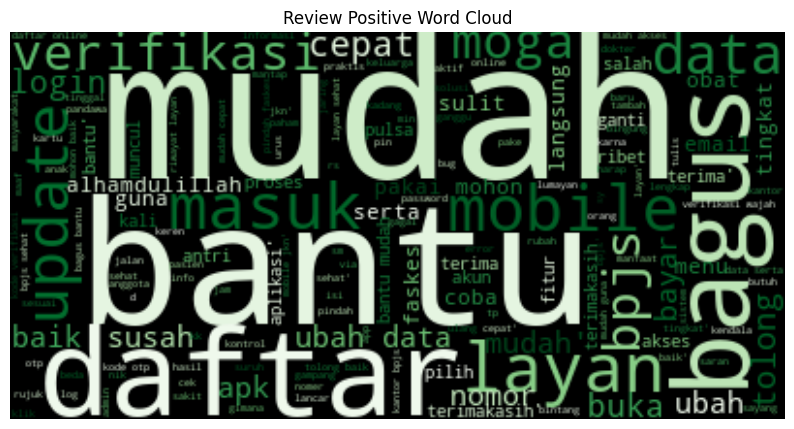

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

custom_stopwords = set(STOPWORDS) 
custom_stopwords.update(["aplikasi", "jkn", "hp"]) 

wordcloud = WordCloud(
    stopwords=custom_stopwords,  #stopwords kustom
    max_font_size=100,
    margin=0,
    background_color="black",
    colormap="Greens"
).generate(filtered_positive)

plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Review Positive Word Cloud")
plt.show()

In [ ]:
import pandas as pd

word_freq = wordcloud.words_

df_wordcloud = pd.DataFrame(word_freq.items(), columns=["Kata", "Bobot"])

top_10_words = df_wordcloud.nlargest(10, "Bobot")

print(top_10_words)

         Kata     Bobot
0       mudah  1.000000
1       bantu  0.766839
2      daftar  0.704663
3       bagus  0.525907
4       layan  0.461140
5       masuk  0.396373
6      mobile  0.388601
7      update  0.334197
8        data  0.287565
9  verifikasi  0.272021


Negatif

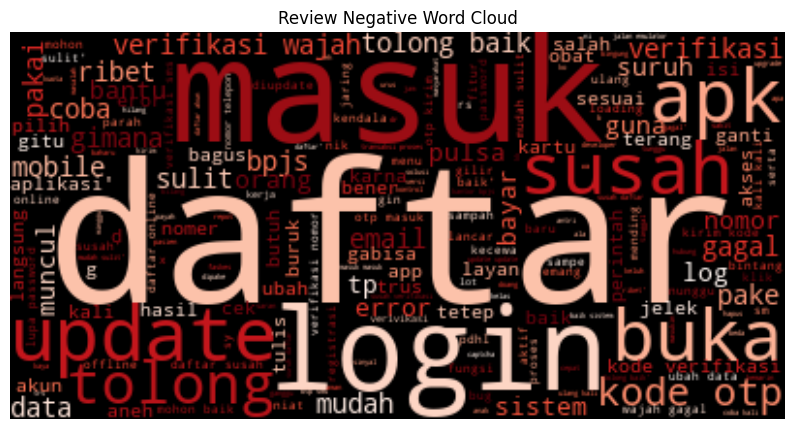

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

custom_stopwords = set(STOPWORDS)  #Stopwords bawaan
custom_stopwords.update(["aplikasi", "jkn", "hp"])  

wordcloud = WordCloud(
    stopwords=custom_stopwords,  #stopwords kustom
    max_font_size=100,
    margin=0,
    background_color="black",
    colormap="Reds"
).generate(filtered_negative)

# Plot WordCloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Review Negative Word Cloud")
plt.show()

In [ ]:
import pandas as pd

# Ekstrak kata-kata dan bobotnya dari WordCloud
word_freq = wordcloud.words_

df_wordcloud = pd.DataFrame(word_freq.items(), columns=["Kata", "Bobot"])

top_10_words = df_wordcloud.nlargest(10, "Bobot")

print(top_10_words)

               Kata     Bobot
0            daftar  1.000000
1             masuk  0.505694
2             login  0.368199
3            update  0.361029
4               apk  0.342893
5              buka  0.315900
6             susah  0.314635
7            tolong  0.303248
8          kode otp  0.291438
9  verifikasi wajah  0.282581
